In [25]:
import numpy as np
import pandas as pd
from  sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb

LOADING DATASET

In [26]:
dfir=pd.read_csv('/content/IRIS.csv')
dfir.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [42]:
dfir['species'].unique()

array([0, 1, 2])

In [35]:
dfir['species'],categories= pd.factorize(dfir['species'])
dfir.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [43]:
dfir.describe()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000,1.013333
std,0.828066,0.433594,1.764420,0.763161,0.819232,0.827276
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


In [45]:
dfir['species'].unique()

array([0, 1, 2])

In [46]:
dfir.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
cluster         0
dtype: int64

VISUALIZING THE DATA

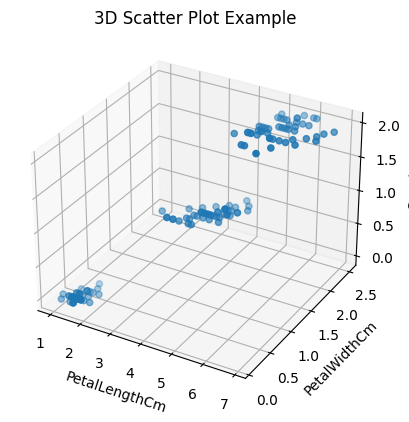

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(dfir.petal_length, dfir.petal_width, dfir.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Example')
plt.show()

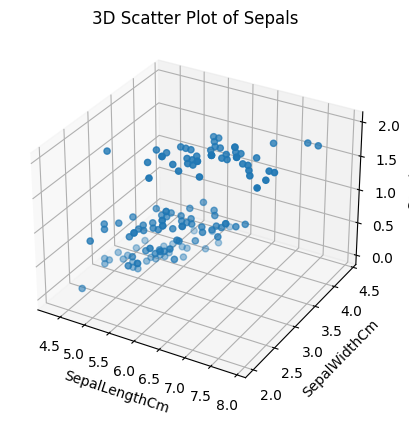

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(dfir.sepal_length,dfir.sepal_width,dfir.species)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot of Sepals')
plt.show()

Therefore 3-D plot indicates that species of iris flower is more inclined towards the variables 'PetalLength' and 'PetalWidth'.

So consider the 2Dplot 3of 3 kinds of species.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

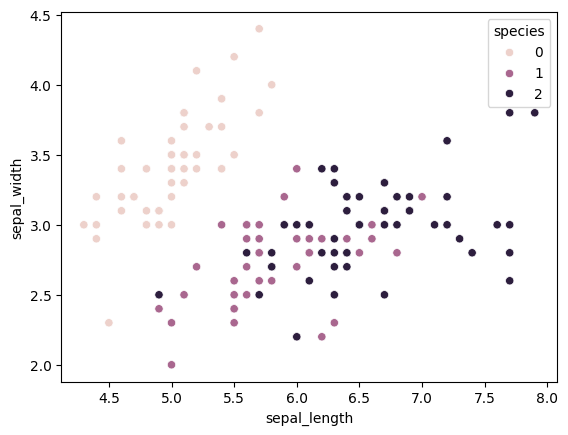

In [49]:
sb.scatterplot(data=dfir,x='sepal_length',y='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

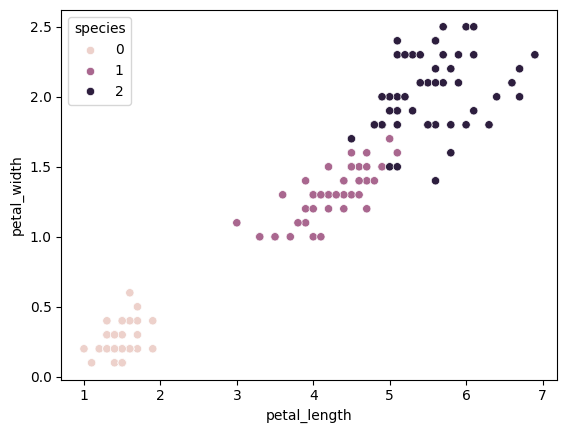

In [50]:
sb.scatterplot(data=dfir,x='petal_length',y='petal_width',hue='species')

In [51]:
k_rng=range(1,10)
sse=[]

for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(dfir[['petal_length', 'petal_width']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [52]:
sse

[550.6434666666669,
 86.40394533571003,
 31.38775897435897,
 19.499400899685114,
 14.084349656750572,
 11.100975219743068,
 9.337790756302523,
 7.688762403043182,
 6.602436796536798]

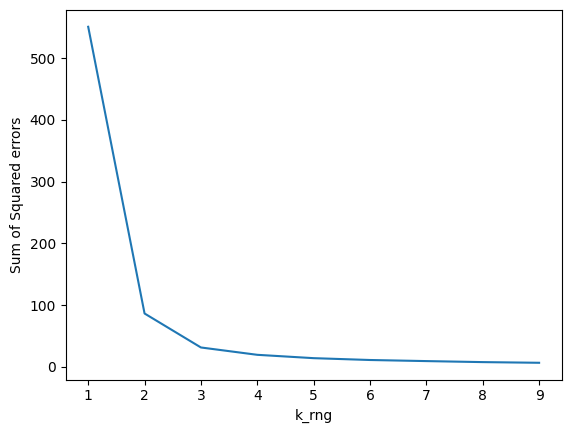

In [53]:
plt.xlabel('k_rng')
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng, sse)

In [54]:
km=KMeans(n_clusters=3, random_state=0)
y_predicted=km.fit_predict(dfir[['petal_length','petal_width']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [55]:
dfir['cluster']=y_predicted
dfir.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(dfir.species, dfir.cluster)
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]])

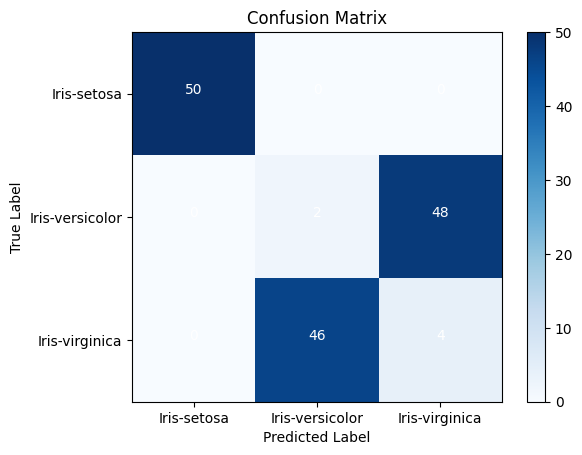

In [60]:
true_labels=dfir.species
predicted_labels=dfir.cluster
cm=confusion_matrix(true_labels, predicted_labels)
class_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks=np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
for i in range(len(class_labels)):
  for j in range(len(class_labels)):
    plt.text(j, i, str(cm[i][j]), ha='center', color='white')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()